(500, 500, 3)


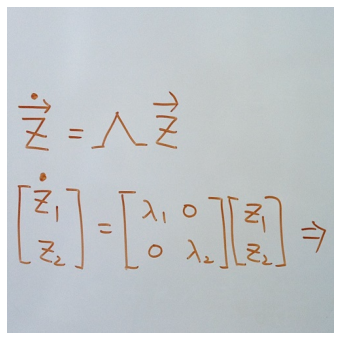

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data_files/handwritten.jpg')
print(img.shape)

plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

(500, 500)


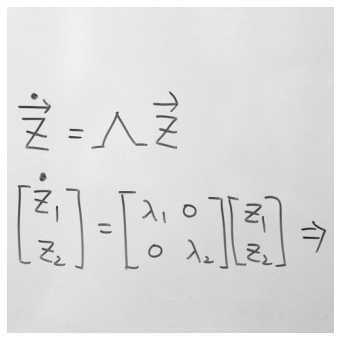

In [2]:
img_gray = cv2.imread('./data_files/handwritten.jpg', 0)
print(img_gray.shape)

plt.figure(figsize = (6, 6))
plt.imshow(img_gray, 'gray')
plt.axis('off')
plt.show()

In [3]:
img_gray

array([[210, 212, 208, ..., 197, 197, 196],
       [211, 211, 211, ..., 194, 195, 195],
       [209, 207, 211, ..., 196, 196, 195],
       ...,
       [193, 195, 194, ..., 178, 179, 177],
       [195, 195, 193, ..., 178, 179, 179],
       [194, 193, 193, ..., 177, 179, 180]], dtype=uint8)

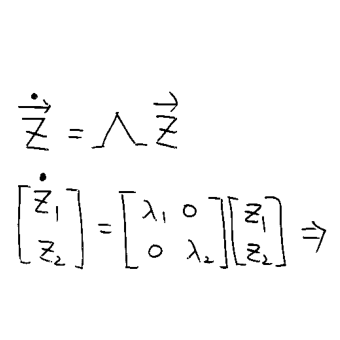

In [4]:
idx = np.where(img_gray > 2**7)

threshold_img = np.zeros(img_gray.shape)
threshold_img[idx] = 255

plt.figure(figsize = (6, 6))
plt.imshow(threshold_img, 'gray')
plt.axis('off')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(img.shape)

k = 2
m = 500

(500, 500, 3)


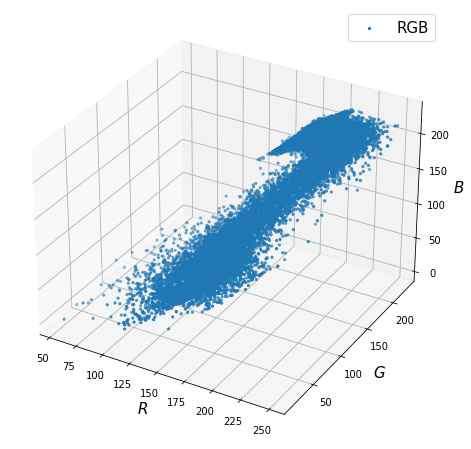

In [6]:
from mpl_toolkits.mplot3d import Axes3D

X = img.reshape(m*m, 3)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('$R$', fontsize = 15)
ax.set_ylabel('$G$', fontsize = 15)
ax.set_zlabel('$B$', fontsize = 15)
ax.scatter(X[:,0], X[:,1], X[:,2], marker = '.', label = 'RGB')
plt.legend(fontsize = 15)
plt.show()

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

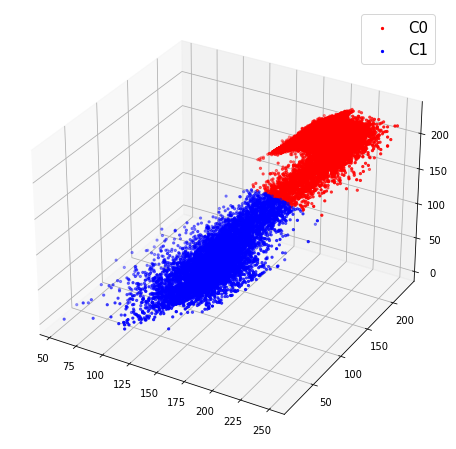

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], X[kmeans.labels_ == 0][:,2], 
           marker = '.', color = 'r', label = 'C0')
ax.scatter(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], X[kmeans.labels_ == 1][:,2], 
           marker = '.', color = 'b', label = 'C1')
plt.legend(fontsize = 15)
plt.show()

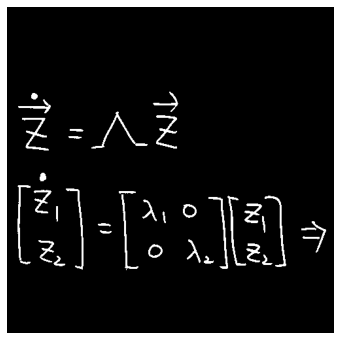

In [9]:
# col_ref = np.array([[255, 255, 255], [0, 0, 0]])
col_ref = np.array([[0, 0, 0], [255, 255, 255]])
img_bw = np.zeros([m*m, 3])

for i in range (2) :
    img_bw[kmeans.labels_ == i] = col_ref[i,:]
    
plt.figure(figsize = (6, 6))
plt.imshow(img_bw.reshape(m,m,3).astype('uint8'))
plt.axis('off')
plt.show()